In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score, precision_recall_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel,SelectKBest,SelectPercentile
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 

In [47]:
#loading data file
#dataset https://archive.ics.uci.edu/ml/datasets/Hepatitis+C+Virus+%28HCV%29+for+Egyptian+patients
fullFileName='HCV-Egy-Data.csv'
df= pd.read_csv(fullFileName, sep=',', header=0)


In [48]:
print("Dataset shape:: ", df.shape)
print("Dataset Lenght:: ",len(df))
df.isnull().sum(axis=0)

Dataset shape::  (1385, 29)
Dataset Lenght::  1385


Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [49]:
print("Dataset:: ")
df.head()
df.info()
df.describe()

Dataset:: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                                 1385 non-null int64
Gender                              1385 non-null int64
BMI                                 1385 non-null int64
Fever                               1385 non-null int64
Nausea/Vomting                      1385 non-null int64
Headache                            1385 non-null int64
Diarrhea                            1385 non-null int64
Fatigue & generalized bone ache     1385 non-null int64
Jaundice                            1385 non-null int64
Epigastric pain                     1385 non-null int64
WBC                                 1385 non-null int64
RBC                                 1385 non-null float64
HGB                                 1385 non-null int64
Plat                                1385 non-null float64
AST 1                               1385 non-null int64
ALT 1                               13

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [50]:
# Label Encoding once more so that we get higher accuracy
# we have 4 classes namely 4,3,2,1
# It would be very beneficial if we combine 4 and 3 as 1 and 2 and 1 as 0
df['Baselinehistological staging'].replace((4, 3, 2, 1), (1, 1, 0, 0), inplace = True)
df['Baselinehistological staging'].value_counts()

1    717
0    668
Name: Baselinehistological staging, dtype: int64

In [51]:
data=df.values
X1 = data[:,0:-1] 
Y = data[:,-1]
 
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
X2 = min_max_scaler.fit_transform(X1) 

  
""" Standardisation """ 
Standardisation = preprocessing.StandardScaler() 
# Scaled feature 
X = Standardisation.fit_transform(X2) 

#Spliting Dataset into Test and Train
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=0)
#Applying Standard scaling to get optimized result

In [52]:
###remove constant,
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [53]:
##duplicate features
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T

In [54]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [55]:
X_train_T.duplicated().sum()

0

In [56]:
####we have duplicate features here
duplicated_features=X_train_T.duplicated()

In [57]:
features_to_keep=[not index for index in duplicated_features]

In [58]:
X_train_=X_train_T[features_to_keep].T
X_test_=X_test_T[features_to_keep].T

In [59]:
X_train_.shape,X_test_.shape

((1108, 28), (277, 28))

In [60]:
#Decision Tree Classifier
#Function to perform training with Entropy
dt=DecisionTreeClassifier(criterion="entropy", random_state=0)
dt.fit(X_train_, y_train)
# Function to make prediction
y_pred_en=dt.predict(X_test_)
#checking performance of the model
print(confusion_matrix(y_test, y_pred_en))
print(classification_report(y_test, y_pred_en))
f1_score(y_test, y_pred_en, average='weighted')


[[76 72]
 [56 73]]
              precision    recall  f1-score   support

         0.0       0.58      0.51      0.54       148
         1.0       0.50      0.57      0.53       129

    accuracy                           0.54       277
   macro avg       0.54      0.54      0.54       277
weighted avg       0.54      0.54      0.54       277



0.5381952470044383

In [61]:
#Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100, max_features=.2)
rfc.fit(X_train_, y_train)
predictionRF=rfc.predict(X_test_)
#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))
f1_score(y_test, predictionRF,average='weighted')


[[62 86]
 [50 79]]
              precision    recall  f1-score   support

         0.0       0.55      0.42      0.48       148
         1.0       0.48      0.61      0.54       129

    accuracy                           0.51       277
   macro avg       0.52      0.52      0.51       277
weighted avg       0.52      0.51      0.51       277



0.505094389880362

In [63]:
#define K
import math
math.sqrt(len(y_test))

16.64331697709324

In [64]:
#K-NN classifier
knn=KNeighborsClassifier(n_neighbors=15, p=2, metric='euclidean')

#predict the test set results
knn.fit(X_train_, y_train)
predictionKNN=knn.predict(X_test_)
#Evaluate model
print(confusion_matrix(y_test, predictionKNN))
print(classification_report(y_test, predictionKNN))
f1_score(y_test, predictionKNN,average='weighted')

[[51 97]
 [49 80]]
              precision    recall  f1-score   support

         0.0       0.51      0.34      0.41       148
         1.0       0.45      0.62      0.52       129

    accuracy                           0.47       277
   macro avg       0.48      0.48      0.47       277
weighted avg       0.48      0.47      0.46       277



0.4632561304479868

In [65]:
# svm Classifier
clf=svm.SVC(kernel="rbf", C=1)
clf.fit(X_train_,y_train)
predictionSVM=clf.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionSVM))
print(classification_report(y_test, predictionSVM))
f1_score(y_test, predictionSVM,average='weighted')


C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[60 88]
 [43 86]]
              precision    recall  f1-score   support

         0.0       0.58      0.41      0.48       148
         1.0       0.49      0.67      0.57       129

    accuracy                           0.53       277
   macro avg       0.54      0.54      0.52       277
weighted avg       0.54      0.53      0.52       277



0.5198003425409062

In [66]:
#Bagging Classifier
bg=BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=10)
bg=BaggingClassifier()
bg.fit(X_train_,y_train)
predictionbg=bg.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionbg))
print(classification_report(y_test, predictionbg))
f1_score(y_test, predictionbg,average='weighted')

[[82 66]
 [75 54]]
              precision    recall  f1-score   support

         0.0       0.52      0.55      0.54       148
         1.0       0.45      0.42      0.43       129

    accuracy                           0.49       277
   macro avg       0.49      0.49      0.49       277
weighted avg       0.49      0.49      0.49       277



0.4892856862735311

In [67]:
#Boosting Classifier- Ada Boost
adb=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
adb.fit(X_train_,y_train)
predictionadb=adb.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionadb))
print(classification_report(y_test, predictionadb))
f1_score(y_test, predictionadb,average='weighted')

[[68 80]
 [65 64]]
              precision    recall  f1-score   support

         0.0       0.51      0.46      0.48       148
         1.0       0.44      0.50      0.47       129

    accuracy                           0.48       277
   macro avg       0.48      0.48      0.48       277
weighted avg       0.48      0.48      0.48       277



0.47694371740776403

In [68]:
#Naive bayse Classifier
nb=GaussianNB()
nb.fit(X_train_,y_train)
predictionnb=nb.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionnb))
print(classification_report(y_test, predictionnb))
f1_score(y_test, predictionnb,average='weighted', labels=np.unique(predictionnb))

[[53 95]
 [46 83]]
              precision    recall  f1-score   support

         0.0       0.54      0.36      0.43       148
         1.0       0.47      0.64      0.54       129

    accuracy                           0.49       277
   macro avg       0.50      0.50      0.48       277
weighted avg       0.50      0.49      0.48       277



0.48110690627158303

In [69]:
#creat Multilayer neural network Classifier
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train_,y_train)
predictionNN=nn.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionNN))
print(classification_report(y_test, predictionNN))
f1_score(y_test, predictionNN,average='weighted', labels=np.unique(predictionNN))


[[ 37 111]
 [ 21 108]]
              precision    recall  f1-score   support

         0.0       0.64      0.25      0.36       148
         1.0       0.49      0.84      0.62       129

    accuracy                           0.52       277
   macro avg       0.57      0.54      0.49       277
weighted avg       0.57      0.52      0.48       277



0.4809892204365729

In [70]:
#Voting Classifier- Multiple Model Ensemble
evc=VotingClassifier(estimators=[('dt',dt),('rfc',rfc),('clf',clf),('knn',knn),('bg',bg),('adb',adb),('nb',nb),('nn',nn)], voting='hard')
evc.fit(X_train_,y_train)
predictionevc=evc.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionevc))
print(classification_report(y_test, predictionevc))
f1_score(y_test, predictionevc,average='weighted', labels=np.unique(predictionevc))

C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[59 89]
 [50 79]]
              precision    recall  f1-score   support

         0.0       0.54      0.40      0.46       148
         1.0       0.47      0.61      0.53       129

    accuracy                           0.50       277
   macro avg       0.51      0.51      0.50       277
weighted avg       0.51      0.50      0.49       277



0.4930670397807175

In [71]:
#defining learning classifiers
names=["Decision_Tree", "Random_Forest", "linear_SVM","Nearest_Neighbors","Bagging","AdaBoost","Naive_Bayes","Neural_Net","Vothing_classifier"]
classifiers = [dt,rfc,clf,knn,bg,adb,nb,nn,evc]

In [72]:
#Build Model, Apply Model on Test Data & Record Accuracy Scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_, y_train)
    prediction=clf.predict(X_test_)
    score=f1_score(y_test, prediction,average='weighted', labels=np.unique(prediction))
    scores.append(score)

C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [73]:
scores

[0.5381952470044383,
 0.5017933938695524,
 0.5198003425409062,
 0.4632561304479868,
 0.4965298609363179,
 0.47590651658125993,
 0.48110690627158303,
 0.4809892204365729,
 0.4825180524324173]

In [74]:
#create data frame of model performance
df = pd.DataFrame()
df['Machine Learning algorithms'] = names
df['F-measure of Transfusion'] = scores 
df

,Machine Learning algorithms,F-measure of Transfusion
0,Decision_Tree,0.538195
1,Random_Forest,0.501793
2,linear_SVM,0.519800
3,Nearest_Neighbors,0.463256
4,Bagging,0.496530
5,AdaBoost,0.475907
6,Naive_Bayes,0.481107
7,Neural_Net,0.480989
8,Vothing_classifier,0.482518


In [75]:
#adding colors to the data frame
cm = sns.light_palette("#FFBF00", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Machine Learning algorithms,F-measure of Transfusion
0,Decision_Tree,0.538195
1,Random_Forest,0.501793
2,linear_SVM,0.5198
3,Nearest_Neighbors,0.463256
4,Bagging,0.49653
5,AdaBoost,0.475907
6,Naive_Bayes,0.481107
7,Neural_Net,0.480989
8,Vothing_classifier,0.482518


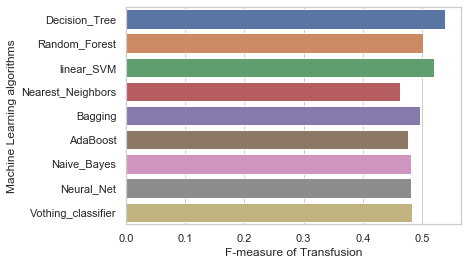

In [76]:
#Bar plot of model performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Machine Learning algorithms", x="F-measure of Transfusion", data=df)
